<a href="https://colab.research.google.com/github/syedzada077/DL_Assignment_1/blob/main/second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load data
data_path = '/content/drive/MyDrive/sports/sports.csv'  # Update with your file path
df = pd.read_csv(data_path)
text_data = df['text'].astype(str)
sentiment_labels = df['sentiment']

In [4]:
df.head()


,text,time,upvote,flair,sport,phase,category,context,extracted_text,sentiment
0,r/nfl's annual crash reddit day.,1.486332e+09,731.0,:Ravens: Ravens,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,r/nfl's annual crash reddit day.,neutral
1,Fuck the people that don't pay attention to fo...,1.486334e+09,488.0,NaN,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,Fuck the people that don't pay attention to fo...,negative
2,I'M FUCKING SCARED. FUCK.,1.486331e+09,217.0,:Falcons: Falcons,Football,1,1U,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,I'M FUCKING SCARED. FUCK.,negative
3,[deleted],1.486331e+09,637.0,NaN,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,[deleted],neutral
4,"Last game of the season. Gentleman, it has bee...",1.486331e+09,242.0,:Eagles: Eagles,Football,1,N,Patriots 34 - 28 Falcons (OT) - 2017 Super Bow...,Last game of the season. Gentleman,negative


In [5]:
# Preprocess data
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(sentiment_labels)
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length)
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, encoded_labels, test_size=0.3, random_state=42, shuffle=True
)
y_train = to_categorical(y_train)  # Convert labels to categorical for multi-class classification
y_test = to_categorical(y_test)

In [6]:
# Define CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Train the model
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.6034 - loss: 0.9026 - val_accuracy: 0.7433 - val_loss: 0.6814
Epoch 2/5
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7557 - loss: 0.6537 - val_accuracy: 0.7431 - val_loss: 0.6663
Epoch 3/5
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7847 - loss: 0.5700 - val_accuracy: 0.7399 - val_loss: 0.6962
Epoch 4/5
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.8208 - loss: 0.4733 - val_accuracy: 0.7269 - val_loss: 0.7873
Epoch 5/5
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 79s 37ms/step - accuracy: 0.8547 - loss: 0.3914 - val_accuracy: 0.7114 - val_loss: 0.9172


In [8]:
# Evaluate the model
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


In [9]:
# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

In [10]:
# Display results
results = pd.DataFrame([{
    "Model": "CNN",
    "Accuracy (%)": round(accuracy * 100, 2),
    "Precision (%)": round(precision * 100, 2),
    "Recall (%)": round(recall * 100, 2),
    "F1 Score (%)": round(f1 * 100, 2),
}])
print(results)

  Model  Accuracy (%)  Precision (%)  Recall (%)  F1 Score (%)
0   CNN         71.14          71.32       71.14         70.76


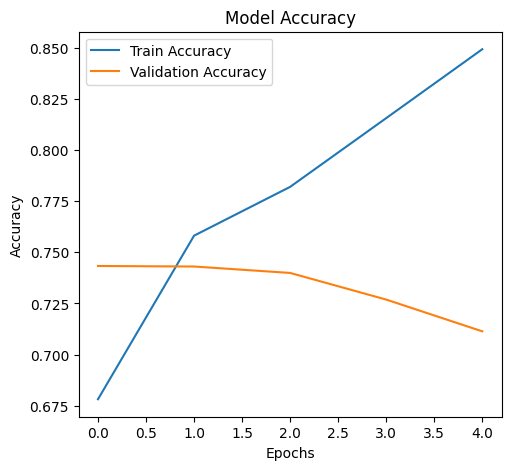

In [11]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

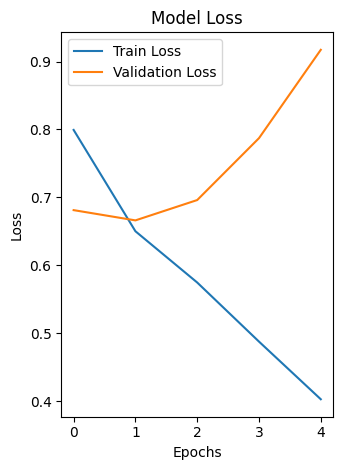

In [12]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()